In [ ]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Colab Notebooks/10monan/training_data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Colab Notebooks/10monan/training_data'     


In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 493 images belonging to 10 classes.
Found 493 images belonging to 10 classes.


In [ ]:
train_dataset.class_indices

{'Banh beo': 0,
 'Banh pia': 1,
 'Banh tet': 2,
 'Bun bo Hue': 3,
 'Ca kho to': 4,
 'Canh chua': 5,
 'Chao long': 6,
 'Com tam': 7,
 'Hu tieu': 8,
 'Pho': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=32,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/30
50/50 [==============================] - 80s 2s/step - loss: nan - accuracy: 0.1095 - val_loss: nan - val_accuracy: 0.1014
Epoch 2/30
50/50 [==============================] - 25s 511ms/step - loss: nan - accuracy: 0.1014 - val_loss: nan - val_accuracy: 0.1014
Epoch 3/30
50/50 [==============================] - 25s 498ms/step - loss: nan - accuracy: 0.1014 - val_loss: nan - val_accuracy: 0.1014
Epoch 4/30
50/50 [==============================] - 26s 523ms/step - loss: nan - accuracy: 0.1014 - val_loss: nan - val_accuracy: 0.1014
Epoch 5/30
50/50 [==============================] - 26s 530ms/step - loss: nan - accuracy: 0.1014 - val_loss: nan - val_accuracy: 0.1014
Epoch 6/30
50/50 [==============================] - 23s 473ms/step - loss: nan - accuracy: 0.1014 - val_loss: nan - val_accuracy: 0.1014
Epoch 7/30
50/50 [==============================] - 25s 491ms/step - loss: nan - accuracy: 0.1014 - val_loss: nan - val_accuracy: 0.1014
Epoch 8/30
50/50 [==========================

In [ ]:
model.save('Dishes10.h5')

In [ ]:
Dishes10_model = load_model('Dishes10.h5')

In [ ]:
score=Dishes10_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

 2/50 [>.............................] - ETA: 8s - loss: 2.3003 - accuracy: 0.1000     

UnknownError: ignored

1/1 [==============================] - 0s 32ms/step
Predict is:  Com Tam


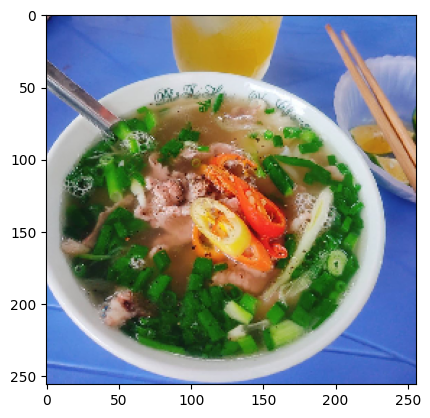

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/10monan/Testing_data/pho/710.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Banh beo','banh pia','Banh tet','Bun bo hue ','Ca kho To','Canh chua','Chao long','Com Tam','Hu tieu','Pho']
print('Predict is: ',Label[int(np.argmax(Dishes10_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 20ms/step
Predict is:  ComTam


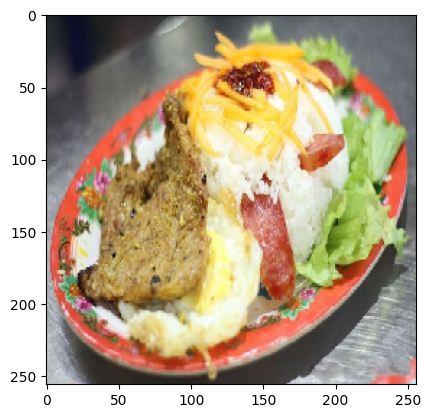

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/10monan/Testing_data/935.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Banh tet','Ca kho to','Bun bo hue','Canh chua','Banh beo','Banh pia','Pho','Com Tam','Hu tieu']
print('Predict is: ',Label[int(np.argmax(Dishes10_model.predict(img),axis=-1))])